In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker

In [2]:
def select_network(network_num, chosen_data):

    data_ret = chosen_data[(chosen_data['PharmNetworkID'] == network_num)]

    groupcols = ['PharmNetworkName', 'SaleMonth']
    data_ret = data_ret.groupby(groupcols)[['Sale20']].sum()
    data_ret = data_ret.reset_index()

    phname = chosen_data[chosen_data['PharmNetworkID'] == network_num]
    phname_ret = phname.iloc[0]['PharmNetworkName']

    label_ret = 'Аптечная сеть: '

    return data_ret, phname_ret, label_ret

In [3]:
def build_graph(data123, label1, name1):
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    #data123['Sale20'].plot(label=name1)
    plt.plot(data123['SaleMonth'], data123['Sale20'], label=name1) 

    #plt.xlabel('dates', fontsize=14)
    ax = plt.gca()
    
    plt.xticks(np.arange(1, len(dates2)+1, 1.0))
    ax.set_xticklabels(dates2['SaleMonth'], fontsize=15, rotation=30)
    #ax.set_xticklabels(data123['SaleMonth'], fontsize=12, rotation=30)
    #plt.xticks(np.arange(1, len(dates)+1, 1.0))
    plt.tight_layout()

    #plt.ylabel('Продажи', fontsize=20)
    #plt.xlabel('Месяц', fontsize=20)
    plt.ylabel('Продажи')
    plt.xlabel('Месяц')
    plt.title(label1 + name1, fontsize=24)
    #plt.savefig(name1 +'.png', dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [4]:
def select_region(region_num, dataregions):

    na_reg = dataregions[dataregions['RegionYandexNameL3ID'] == region_num]
    name_reg_ret = na_reg.iloc[0]['RegionYandexNameL3']

    label_reg_ret = 'Регион: '


    data_reg_ret = dataregions[(dataregions['RegionYandexNameL3ID'] == region_num)]

    groupcols2 = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth']
    data_reg_ret = data_reg_ret.groupby(groupcols2)[['Sale20']].sum()
    data_reg_ret = data_reg_ret.reset_index()
    
    return data_reg_ret, name_reg_ret, label_reg_ret

# Открытие файлов с продажами и аптеками

In [5]:
data2017 = pd.read_excel('2017S-D.xlsx', sheet_name='S2017')
drugstores2017 = pd.read_excel('2017S-D.xlsx', sheet_name='Drug2017')

data2_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleMonth', 'ProductID', 'Sale20']

sale2017 = data2017[data2_columns]
sale2017['PharmNetworkID'] = sale2017['PharmNetworkID'].astype(int)

#####################

data2018 = pd.read_excel('2018S-D.xlsx', sheet_name='S2018')
drugstores2018 = pd.read_excel('2018S-D.xlsx', sheet_name='Drug2018')

sale2018 = data2018[data2_columns]

region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']
region2018 = data2018[region_columns]

#####################

data2019 = pd.read_excel('2019S-D.xlsx', sheet_name='S2019')
drugstores2019 = pd.read_excel('2019S-D.xlsx', sheet_name='Drug2019')

data_columns2019 = ['PharmNetworkID', 'PharmNetworkName', 'SaleMonth', 'ProductID', 'Sale20']
sale2019 = data2019[data_columns2019]

region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']
region2019 = data2019[region_columns]

In [6]:
dates = sorted(data2018['SaleMonth'].unique())
dates2 = pd.DataFrame({'SaleMonth':dates})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
pharmnetworks = pd.read_excel('Dictionary.xlsx', sheet_name='Pharmnetworks')

ДОБАВЛЛЕНИЕ ID В 2017 ГОД

In [13]:
sale2017['PharmNetworkID'] = np.where(sale2017['PharmNetworkName'] == 'еАптека', 30, sale2017['PharmNetworkID'])
sale2017['PharmNetworkID'] = np.where(sale2017['PharmNetworkName'] == 'Ригла (Будь Здоров)', 1, sale2017['PharmNetworkID'])
#sale2017['PharmNetworkID'] = np.where(sale2017['PharmNetworkName'] == 'Имплозия', 94, sale2017['PharmNetworkID'])
#sale2017['PharmNetworkID'] = np.where(sale2017['PharmNetworkName'] == 'ЭРКАФАРМ', 17, sale2017['PharmNetworkID'])
#sale2017['PharmNetworkID'] = np.where(sale2017['PharmNetworkName'] == 'Апрель', 36, sale2017['PharmNetworkID'])
#sale2017['PharmNetworkID'] = np.where(sale2017['PharmNetworkName'] == 'ИП Гончарова', 9, sale2017['PharmNetworkID'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
networks2017_without_id = sale2017[sale2017['PharmNetworkID'] == 0]
networks2017_without_id['PharmNetworkName'].unique()

array(['Имплозия', 'Мелодия здоровья', 'Нео-Фарм, Столички',
       'Планета здоровья, ОПЕКА', 'Фармаимпекс', 'Аптека Таймер',
       'ИРИС-ТД', 'ИРИС-ФК', 'ИРИС-ХМ', 'ФК', 'ТД', 'ХМ', 'ФК/ХМ',
       'ПроАптека', 'AVE +36.6', 'АСНА', 'Мобила (Вита)', 'Живика',
       'Самсон-Фарма', 'Аптека-сити', 'Гармония Плюс', 'МИС', 'ИП Коуров',
       'Сконто', 'ИП Калганова', 'ИП Зорина', 'ЭРКАФАРМ', 'ИП Бережная',
       'Бонум', 'Социальная аптека', 'Тиннер-Б', 'Сияние', 'Лекомед',
       'Губернские аптеки', 'ИП Гончарова', 'Фармация Мурманская',
       'Аптека Вашей семьи', 'Здоровье (Усть-Лабинск)', 'ИП Лещинская',
       'Аптека РОСФАРМСНАБ', 'Апрель', 'Фармгарант', 'Рослек',
       'Аптечный дом', 'Гармония здоровья', 'ИП Чубова', 'Левзея',
       'Эвалар', 'Диалог', 'Сатурн (Экономъ)', 'Здоров.ру', 'Солнышко',
       'А.Р.М.', 'Здоровый город', 'ЕКАТЕРИНБУРГ - Фармарт',
       'Аптечный Дом Рязань', 'Алвик', 'Источник здоровья', 'Классика',
       'Столет', 'Новая больница', 'Пермфармац

In [15]:
#writer = pd.ExcelWriter('2017_year_with_ID.xlsx', engine='xlsxwriter')
#sale2017.to_excel(writer, sheet_name='123', index=False)
#writer.save()

# Построение графика продаж за 2018/2019 год для выбранной Аптечной Сети #

In [16]:
pharmid = 1

# ID Аптечной Сети

sale_select = sale2017
# 2017 год

#sale_select = sale2018
# 2018 год

#sale_select = sale2019
# 2019 год


data_select, name1, label1 = select_network(pharmid, sale_select)
data_select

,PharmNetworkName,SaleMonth,Sale20
0,Ригла (Будь Здоров),1,87886.0
1,Ригла (Будь Здоров),2,71355.0
2,Ригла (Будь Здоров),3,74197.0
3,Ригла (Будь Здоров),4,51826.0
4,Ригла (Будь Здоров),5,37386.0
5,Ригла (Будь Здоров),6,28425.0
6,Ригла (Будь Здоров),7,24543.0
7,Ригла (Будь Здоров),8,50787.0
8,Ригла (Будь Здоров),9,272739.0
9,Ригла (Будь Здоров),10,85032.0


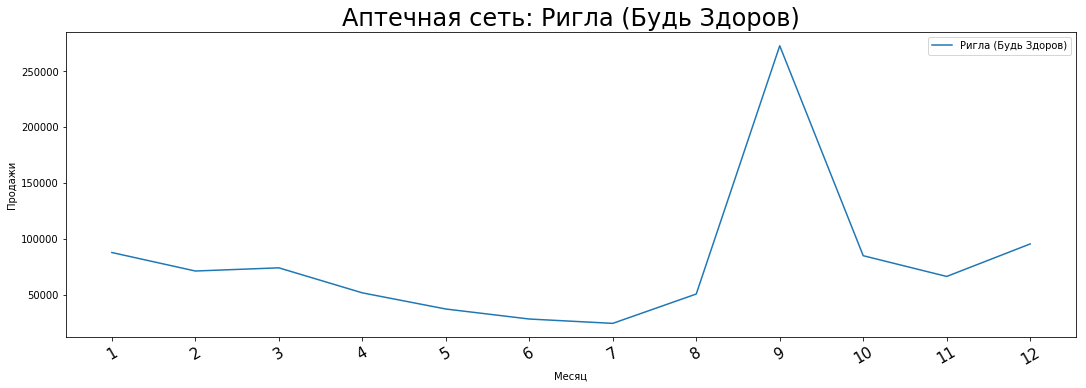

In [17]:
build_graph(data_select, label1, name1)

# Построение графика для 1-го региона #

In [18]:
number_region = 78

#########################

#region_select = region2018
# 2018 год

region_select = region2019
# 2019 год

data_reg_in, name_reg_in, label_reg_in = select_region(number_region, region_select)
data_reg_in

,RegionYandexNameL3ID,RegionYandexNameL3,SaleMonth,Sale20
0,78.0,Санкт-Петербург,1,74890.0
1,78.0,Санкт-Петербург,2,84252.0
2,78.0,Санкт-Петербург,3,100988.0
3,78.0,Санкт-Петербург,4,58612.0
4,78.0,Санкт-Петербург,5,27818.0
5,78.0,Санкт-Петербург,6,19685.5


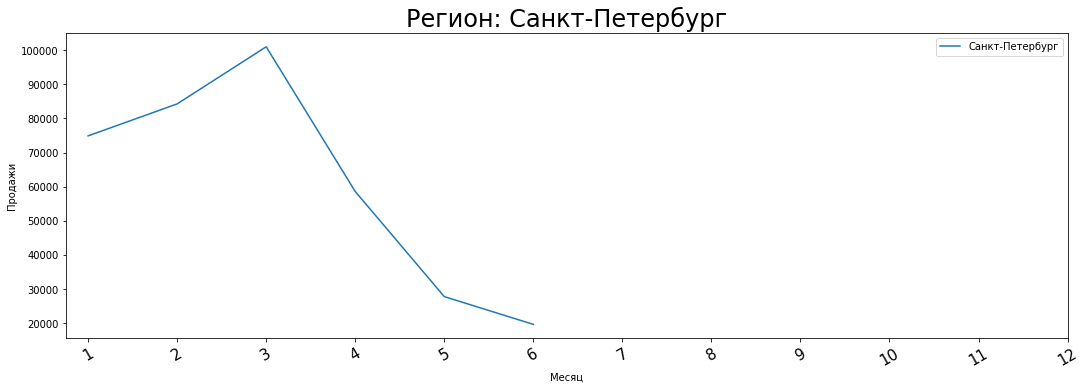

In [19]:
build_graph(data_reg_in, label_reg_in, name_reg_in)

# Построение графиков продаж для НЕСКОЛЬКИХ Аптечных Сетей #

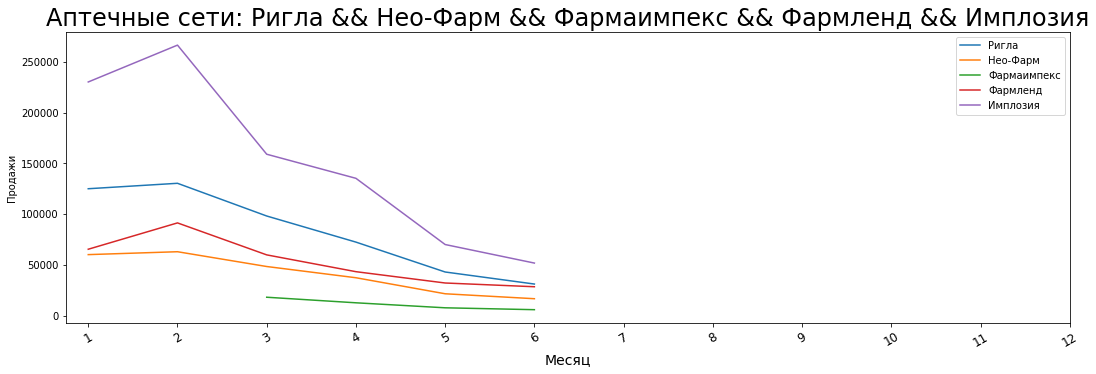

In [20]:
#sale_select = sale2017
# 2017 год

#sale_select = sale2018
# 2018 год

#sale_select = sale2019
# 2019 год

#####################

several_n = [1, 3, 4, 93, 94]

#####################
qnames = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for i in several_n:
    qdata, qname, qlabel = select_network(i, sale_select)
    plt.plot(qdata['SaleMonth'], qdata['Sale20'], label=qname) 
    #qdata['Sale20'].plot(label=qname)
    qnames.append(qname)
    
re_label = 'Аптечные сети: '
re_label2 = 'Аптечные сети '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(1, len(dates2)+1, 1.0))
ax.set_xticklabels(dates2['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname = ' && '.join(qnames)
    
plt.title(re_label + string_qname, fontsize=24)


# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(re_label2 + string_qname +'.png', dpi=300, bbox_inches='tight')


plt.legend()
plt.show()

# Построение графика для НЕСКОЛЬКИХ регионов #

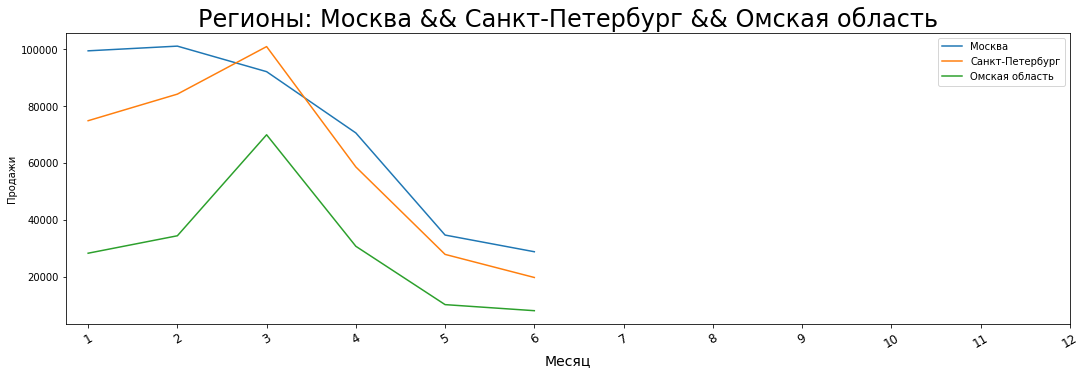

In [21]:
#region_select = region2018
# 2018 год

#region_select = region2019
# 2019 год

several_regions = [77, 78, 55]

#####################
qnames_r = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for j in several_regions:
    qdata_r, qname_r, qlabel_r = select_region(j, region_select)
    plt.plot(qdata_r['SaleMonth'], qdata_r['Sale20'], label=qname_r) 
    qnames_r.append(qname_r)
    
re_label_r = 'Регионы: '
re_label_r2 = 'Регионы '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(1, len(dates2)+1, 1.0))
ax.set_xticklabels(dates2['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname_r = ' && '.join(qnames_r)
    
plt.title(re_label_r + string_qname_r, fontsize=24)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(re_label_r2 + string_qname_r +'.png', dpi=300, bbox_inches='tight')

plt.legend()
plt.show()

# Просмотр аптечных сетей #

In [22]:
network_cols = ['PharmNetworkName', 'PharmNetworkID', 'PharmNetworkType2']
pharmnetworks = pharmnetworks.sort_values(by=['PharmNetworkType', 'PharmNetworkName'])
network_id = pharmnetworks[network_cols]
network_id = network_id.drop_duplicates()
network_id = network_id.sort_values(by=['PharmNetworkID'])
network_id = network_id.reset_index()
network_id = network_id[network_cols]

pd.options.display.max_rows = 150

#pharmnetworks

In [23]:
regions_cols = ['RegionYandexNameL3', 'RegionYandexNameL3ID']
regions_id = region2018[regions_cols]
regions_id = regions_id.drop_duplicates()
regions_id = regions_id.sort_values(by=['RegionYandexNameL3ID'])
regions_id = regions_id.reset_index()
regions_id = regions_id[regions_cols]

#regions_id

# Сравнение 2017-2018-2019 годов

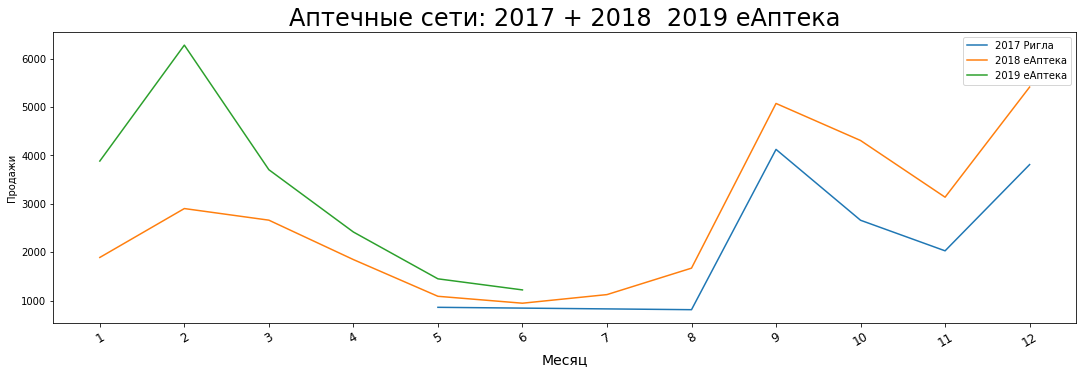

In [42]:
pharm_compare = 30

#####################
qnames = []

fig, ax = plt.subplots(1, 1, figsize=(15,5))

qdata3, qname3, qlabel3 = select_network(pharm_compare, sale2017)
plt.plot(qdata3['SaleMonth'], qdata3['Sale20'], label='2017 ' + qname) 
qnames.append('2017 ' + qname)
ax.set_xticklabels(qdata3['SaleMonth'], fontsize=12, rotation=30)

qdata, qname, qlabel = select_network(pharm_compare, sale2018)
plt.plot(qdata['SaleMonth'], qdata['Sale20'], label='2018 ' + qname) 
qnames.append('2018 ' + qname)

qdata5, qname5, qlabel5 = select_network(pharm_compare, sale2019)
plt.plot(qdata5['SaleMonth'], qdata5['Sale20'], label='2019 ' + qname) 
qnames.append('2019 ' + qname)
ax.set_xticklabels(qdata5['SaleMonth'], fontsize=12, rotation=30)
   
re_label = 'Аптечные сети: '
re_label2 = 'Аптечные сети '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(1, len(dates2)+1, 1.0))
ax.set_xticklabels(dates2['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()
plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname = ' && '.join(qnames)   
plt.title(re_label + '2017 +'+ ' 2018 ' + ' 2019 '+ qname, fontsize=24)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(re_label2 + string_qname +'.png', dpi=300, bbox_inches='tight')

plt.legend()
plt.show()

# Графики 2017-2018-2019

In [43]:
d = {'SaleMonth': [1,2,3,4,5,6,7,8,9,10,11,12]}
qdata4 = pd.DataFrame(data=d)
qdata4 = qdata4.merge(qdata, left_on='SaleMonth', right_on='SaleMonth', how='left')
qdata4 = qdata4.merge(qdata3, left_on='SaleMonth', right_on='SaleMonth', how='left')
qdata4 = qdata4.merge(qdata5, left_on='SaleMonth', right_on='SaleMonth', how='left')

qdata4['2018'] = qdata4['Sale20_x']
qdata4['2017'] = qdata4['Sale20_y']
qdata4['2019'] = qdata4['Sale20']

qdata4 = qdata4.drop(['PharmNetworkName_x', 'Sale20_x', 'PharmNetworkName_y', 'Sale20_y'], axis=1)
qdata4 = qdata4.set_index('SaleMonth')
qdata4 = qdata4.fillna(0)
qdata4['2017'] = qdata4['2017'].astype(int)
qdata4['2018'] = qdata4['2018'].astype(int)
qdata4['2019'] = qdata4['2019'].astype(int)

qdata4.sort_index(inplace=True)

#qdata4

In [44]:
qdata4 = qdata4[['2017', '2018', '2019']]
qdata4

,2017,2018,2019
SaleMonth,,,
1,0,1891,3884
2,0,2902,6281
3,0,2662,3705
4,0,1847,2417
5,860,1088,1449
6,0,945,1220
7,0,1123,0
8,811,1670,0
9,4125,5075,0


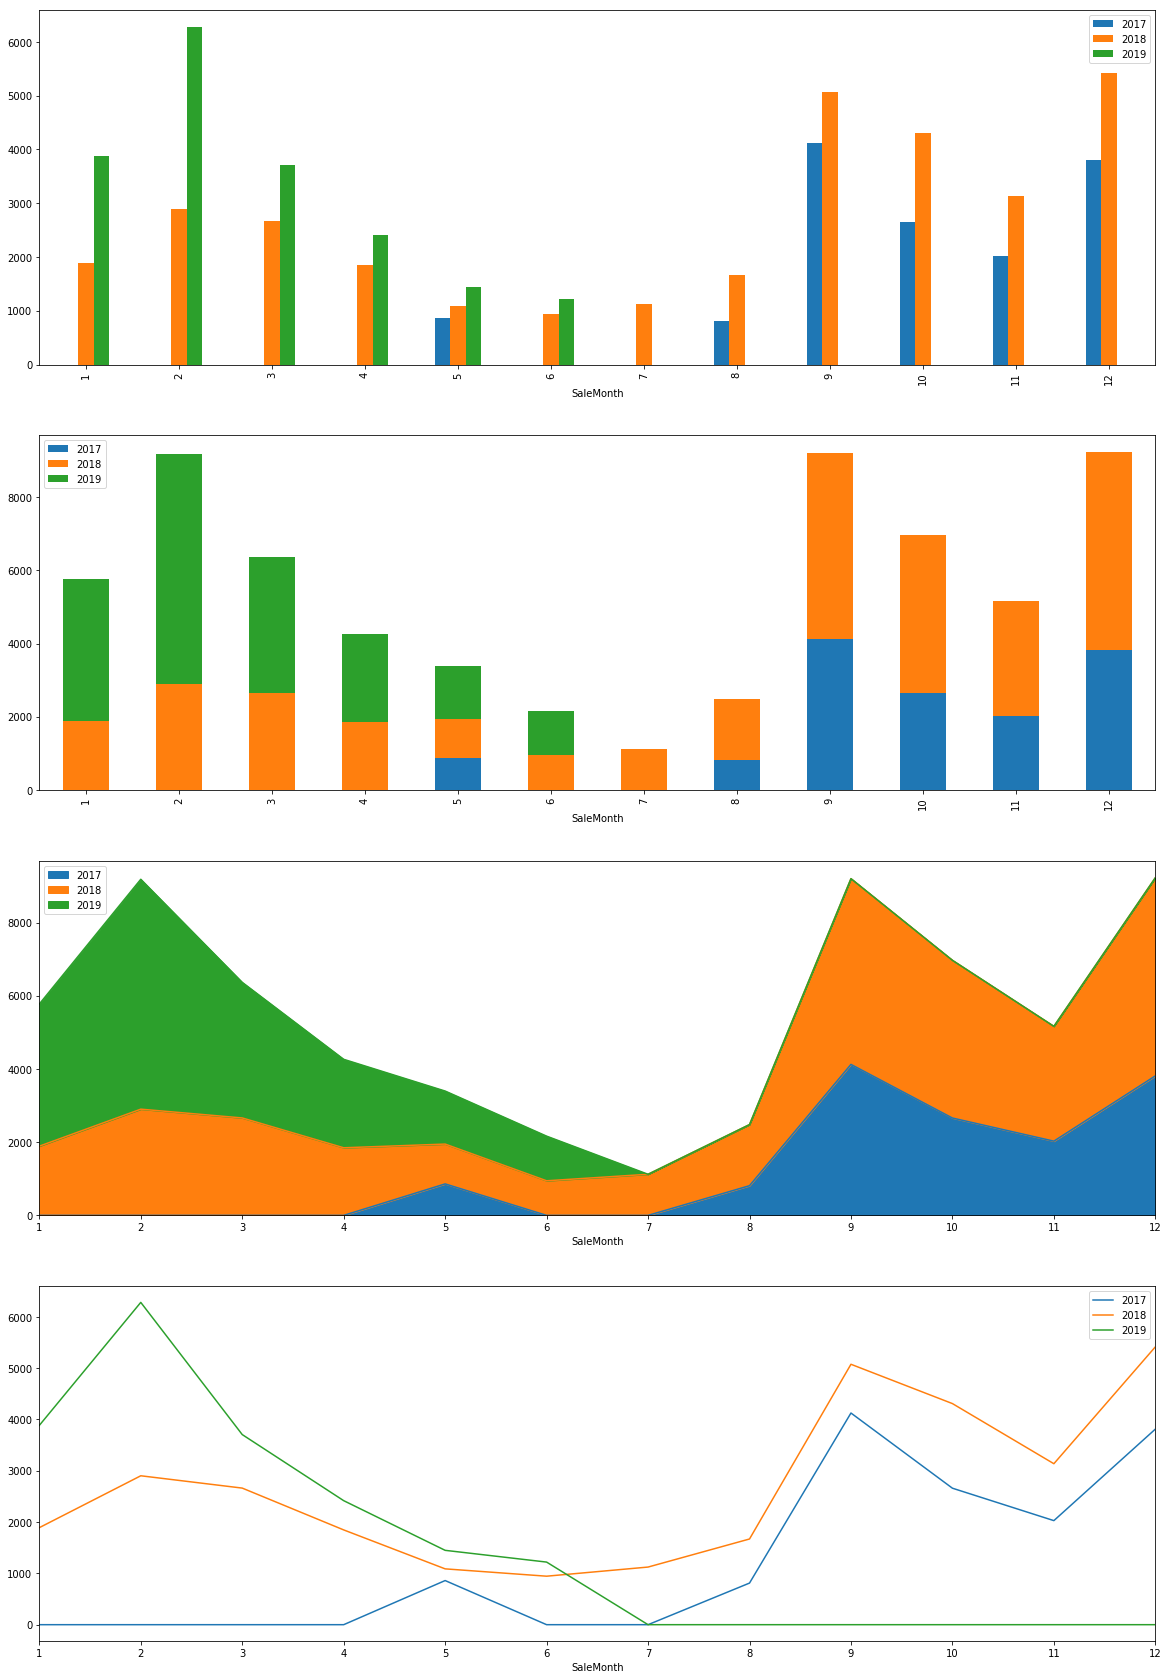

In [45]:
fig, axes = plt.subplots(4, 1, figsize=(20, 30))

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
axes[2].xaxis.set_major_locator(loc)
axes[3].xaxis.set_major_locator(loc)

qdata4.plot.bar(stacked=False, ax = axes[0])
qdata4.plot.bar(stacked=True, ax = axes[1])
qdata4.plot.area(ax = axes[2])
qdata4.plot(ax = axes[3])

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(qname +'.png', dpi=300, bbox_inches='tight')

## Тепловой график

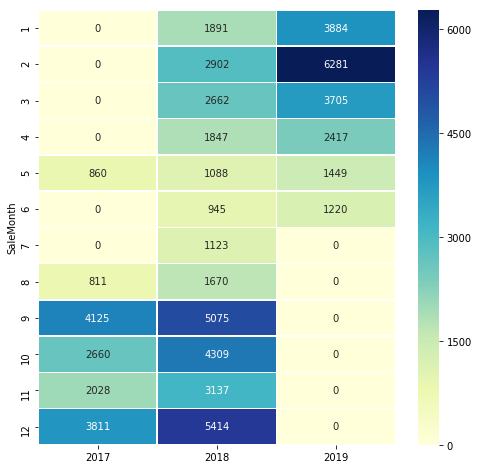

In [56]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(qdata4, annot=True, fmt=".0f", linewidths=.5, cmap="YlGnBu", ax=ax);

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(qname + '_тепловой_график' + '.png', dpi=300, bbox_inches='tight')

## График для 3-х лет

In [47]:
frames_concat = [qdata4['2017'], qdata4['2018'], qdata4['2019']]

data_concat = pd.concat(frames_concat)
data_concat = data_concat.reset_index()

all_years = []

for i in range(1, 37):
    all_years.append(i)
    
data_concat['ThreeYrsPeriod'] = all_years
data_concat.columns = ['RealMonth', qname, 'ThreeYrsPeriod']
data_concat = data_concat.set_index('ThreeYrsPeriod')
data_concat = data_concat.drop(['RealMonth'], axis=1)

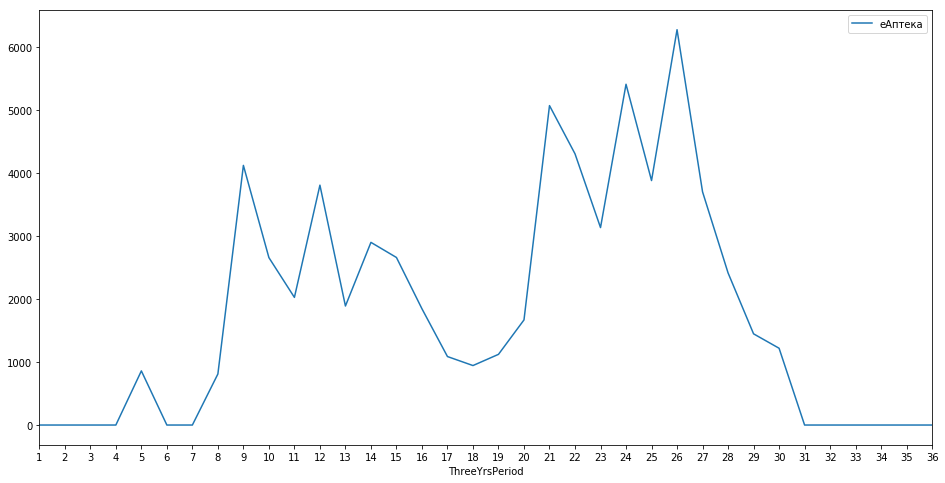

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
data_concat.plot(ax = ax)

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(qname + '_за_3_года' + '.png', dpi=300, bbox_inches='tight')

In [31]:
#data_concat

# Многомерные графики

In [32]:
pharmid = 30

#data_view = sale2019
# 2019 год #

data_view = sale2018
# 2018 год #

#data_view = sale2017
# 2017 год #

data_select = data_view[(data_view['PharmNetworkID'] == pharmid)]
#data_select.head()

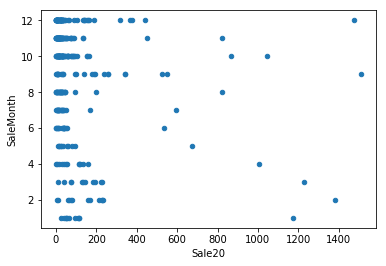

In [33]:
#data_select.plot.scatter(x='SaleMonth', y='Sale20')

# МЕСЯЦ СНИЗУ #


data_select.plot.scatter(x='Sale20', y='SaleMonth')

# МЕСЯЦ СБОКУ #

In [34]:
anomaly = 500

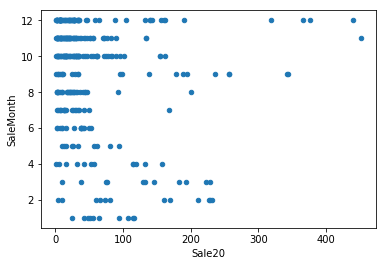

In [35]:
data_select[data_select['Sale20'] < anomaly].plot.scatter(x='Sale20', y='SaleMonth')

# ПОСТРОЕНИЕ С ФИЛЬТРАЦИЕЙ (БЕЗ АНОМАЛИЙ) 

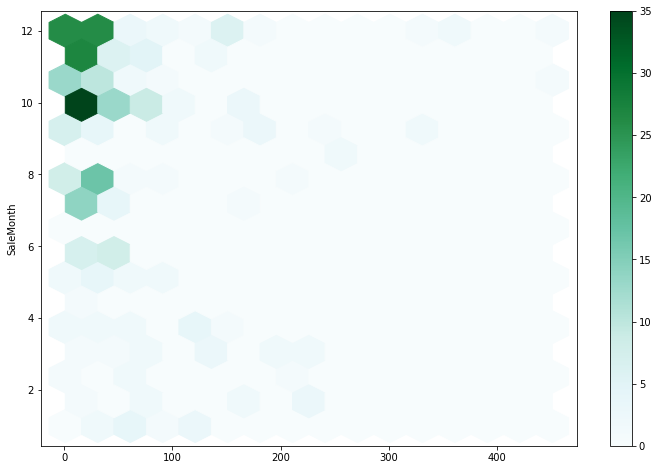

<Figure size 432x288 with 0 Axes>

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
data_select[data_select['Sale20'] < anomaly].plot.hexbin(x='Sale20', y='SaleMonth', gridsize=15, ax=ax)
plt.xlabel('')
plt.show()

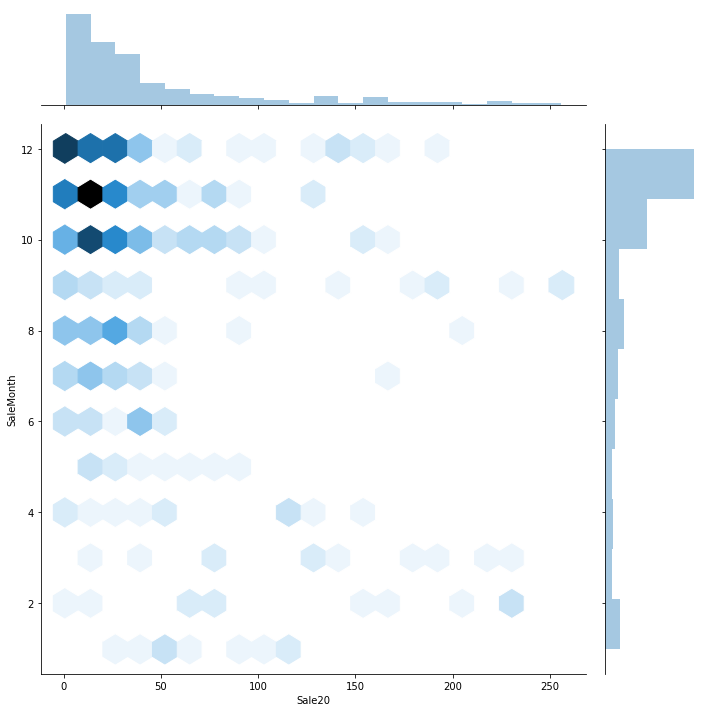

In [51]:
sns.jointplot(x='Sale20', y='SaleMonth', data=data_select[data_select['Sale20'] < 300], kind='hex', height=10, gridsize=20)
#sns.jointplot(x='SaleMonth', y='Sale20', data=data_select[data_select['Sale20'] < 300], kind='hex', height=10, gridsize=20)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(qname + '_шестигранники' + '.png', dpi=300, bbox_inches='tight')

## Графики Box и Violin plot

Box plot и Violin plot
Box plot дословно график-коробка и, вобщем то, он и состоит из коробки, а также усиков и точек. Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) процентили. Черта внутри коробки обозначает медиану распределения. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5IQR, Q3 + 1.5IQR), где IQR = Q3 - Q1 - интерквантильный размах. Точки на графике это выбросы- те значения, которые не вписываются в промежуток значений, заданный усами графика.

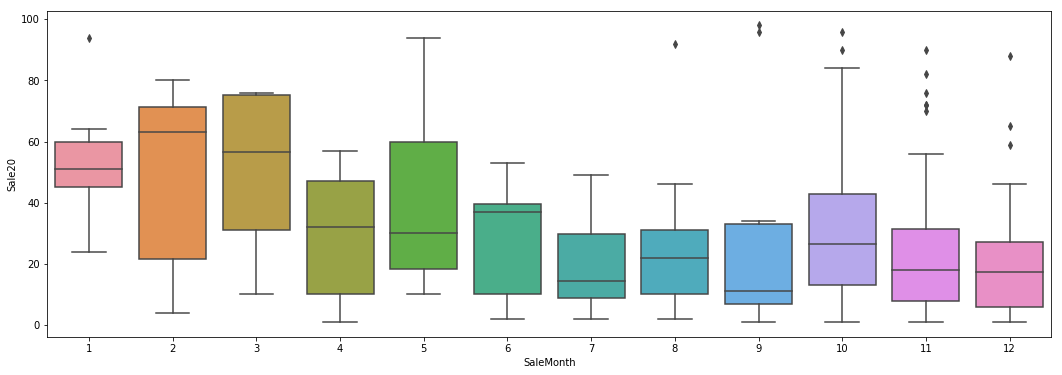

In [52]:
fig, ax = plt.subplots(figsize=(18,6))  
sns.boxplot(
     x='SaleMonth',
     y='Sale20',
#     x='Sale20',
#     y='SaleMonth',
    data=data_select[data_select['Sale20'] < 100]
)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(qname + '_boxplot' + '.png', dpi=300, bbox_inches='tight')

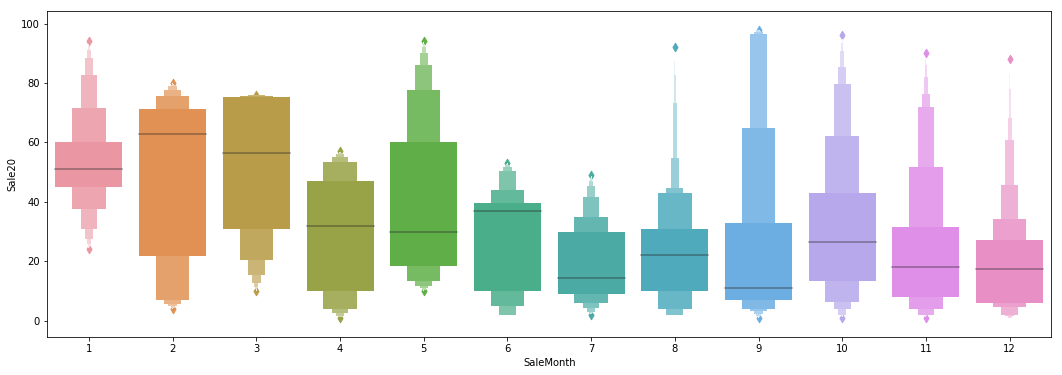

In [54]:
fig, ax = plt.subplots(figsize=(18,6))  
sns.boxenplot(
     x='SaleMonth',
     y='Sale20',
#     x='Sale20',
#     y='SaleMonth',
    data=data_select[data_select['Sale20'] < 100]
)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(qname + '_boxenplot' + '.png', dpi=300, bbox_inches='tight')

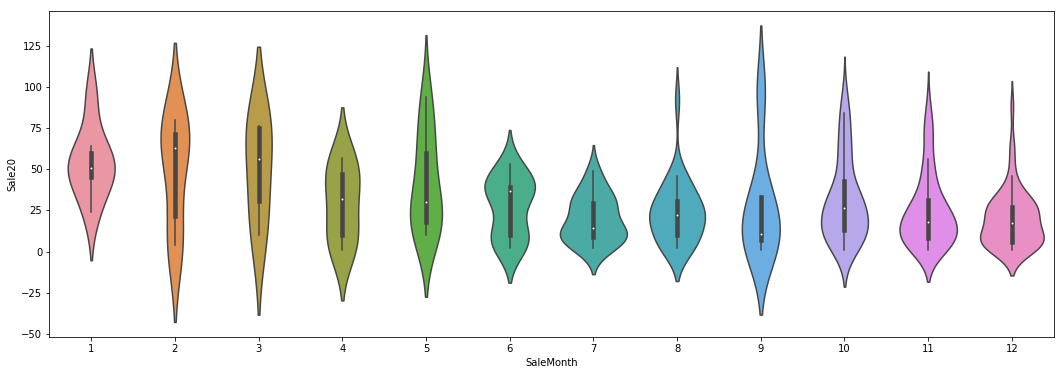

In [53]:
fig, ax = plt.subplots(figsize=(18,6))  
sns.violinplot(
    x='SaleMonth',
    y='Sale20',
    data=data_select[data_select['Sale20'] < 100]
)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(qname + '_violinplot' + '.png', dpi=300, bbox_inches='tight')